## 라이브러리 호출

In [6]:
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm

# 그래프 Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
mpl.rc('font',family= font_name)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### 예측
# Decision tree
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
#랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor
#그래디언트 부스팅
from sklearn.ensemble import GradientBoostingRegressor
# 정규분포 및 회귀분석 등
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
# Support Vector Machine (예측)
from sklearn.svm import SVR
# KNN
from sklearn.neighbors import KNeighborsRegressor

### 분류
#평가함수 (분류)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#로지스틱 회귀분석
from statsmodels.api import Logit
# Decision tree
from sklearn.tree import DecisionTreeClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
# Support Vector Machine (분류)
from sklearn.svm import SVC
# KNN
from sklearn.neighbors import KNeighborsClassifier
#XG BOOST
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance

#스케일링
from sklearn.preprocessing import scale, minmax_scale, robust_scale
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
#선형 회귀모형
from sklearn.linear_model import LinearRegression
#변수선택법 (후진제거법)
from sklearn.feature_selection import RFE
#스케일 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

## 로데이터 호출

In [43]:
df_raw = pd.read_csv("/home/pirl/Statistics/Day3_0715/유방암.csv", engine = "python", encoding="CP949")
df_raw.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 로데이터 행*렬 모양을 확인하기 위해, 아래와 같이 명령어 입력

In [44]:
df_raw.shape

(569, 31)

## 결측값 확인하기 위해 isnull함수 사용

In [45]:
df_raw.isnull().sum(axis=0)

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

## 아래 이상치 확인 결과, 두 변수에서 이상치 발견되었으나 명확한 변수에 대한 이해도가 없으므로, 변수를 그대로 사용해줌

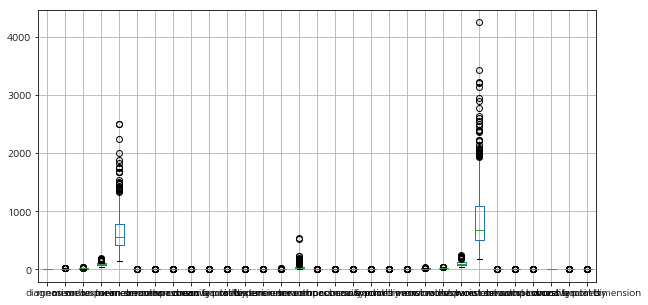

In [46]:
df_raw.boxplot(figsize= (10,5))

## 종속변수인 diagnosis 악성을 0에서 1로 다시 코딩해주기 위해 아래와 같은 절차를 밟음
결과 해석의 용의성을 위해, 실제 암이 발생하는 경우(악성)를 1로 두고자 함

## 악성 0->1 / 양성 1->0

In [47]:
df_raw["diagnosis"] = np.where(df_raw['diagnosis'] == 1,0,1)

In [48]:
df_raw["diagnosis"].sum()

357

## Raw Data를 x와 y변수로 나누어줌

In [49]:
df_raw_x = df_raw.drop("diagnosis", axis = 1, inplace =False)
df_raw_y = df_raw["diagnosis"]

## 나누어진 X변수를 스케일링해서 서포트벡터 머신에 사용할 수 있게 전처리함 (서포트벡터머신은 데이터 크기에 민감함)

In [3]:
v_feature_name = df_raw_x.columns

scaler = minmax_scaler()
df_scaled_raw_x = scaler.fit_transform(df_raw_x)
df_scaled_raw_x = pd.DataFrame(df_scaled_raw_x, columns = v_feature_name)
df_scaled_raw_x.head()

NameError: name 'df_raw_x' is not defined

In [1]:
df_raww = [10, 4, 7, 1]

In [8]:
df_raww = pd.DataFrame(df_raww)

In [13]:
scaler = minmax_scale(df_raww)

In [14]:
scaler

array([[1.        ],
       [0.33333333],
       [0.66666667],
       [0.        ]])

In [10]:
scaler = minmax_scale()
df_scaled_raw_x = scaler.fit_transform(df_raww, )
df_scaled_raw_x = pd.DataFrame(df_scaled_raw_x)
df_scaled_raw_x.head()

TypeError: minmax_scale() missing 1 required positional argument: 'X'

In [12]:
?minmax_scale

Signature: minmax_scale(X, feature_range=(0, 1), axis=0, copy=True)
Docstring:
Transforms features by scaling each feature to a given range.

This estimator scales and translates each feature individually such
that it is in the given range on the training set, i.e. between
zero and one.

The transformation is given by (when ``axis=0``)::

    X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    X_scaled = X_std * (max - min) + min

where min, max = feature_range.

The transformation is calculated as (when ``axis=0``)::

   X_scaled = scale * X + min - X.min(axis=0) * scale
   where scale = (max - min) / (X.max(axis=0) - X.min(axis=0))

This transformation is often used as an alternative to zero mean,
unit variance scaling.

Read more in the :ref:`User Guide <preprocessing_scaler>`.

.. versionadded:: 0.17
   *minmax_scale* function interface
   to :class:`sklearn.preprocessing.MinMaxScaler`.

Parameters
----------
X : array-like, shape (n_samples, n_features)
    The data.

## 데이터를 Train 데이터와 Validation, Test 데이터로 나누어줌

In [50]:
df_scaled_train_x, df_scaled_test_x, df_train_y, df_test_y = train_test_split(df_scaled_raw_x, df_raw_y, test_size = 0.3, random_state=1234)
df_scaled_train_x, df_scaled_val_x, df_train_y, df_val_y = train_test_split(df_scaled_train_x, df_train_y, test_size = (0.3/0.7), random_state=1234)

print("train data X size : {}".format(df_scaled_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_scaled_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))
print("validation data X size : {}".format(df_scaled_val_x.shape))
print("validation data Y size : {}".format(df_val_y.shape))

train data X size : (227, 30)
train data Y size : (227,)
test data X size : (171, 30)
test data Y size : (171,)
validation data X size : (171, 30)
validation data Y size : (171,)


## 서포트 벡터 머신 기본값으로 모델링 실시, 테스트셋 설명력 54.4%

In [53]:
svm_scaled = SVC()
svm_scaled.fit(df_scaled_train_x, df_train_y)

print("Score on training set : {:.3f}".format(svm_scaled.score(df_scaled_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(svm_scaled.score(df_scaled_val_x, df_test_y)))

Score on training set : 0.996
Score on test set : 0.544


## COST 수치의 최적화를 위해 0.01부터 10까지 돌려가며 확인

In [55]:
train_score = []; test_score = []

para_C = [10 ** c for c in range (-2,2)]

for v_C in para_C :
    svm = SVC(C= v_C)
    svm.fit(df_scaled_train_x,df_train_y)
    train_score.append(svm.score(df_scaled_train_x, df_train_y))
    test_score.append(svm.score(df_scaled_val_x, df_test_y))
    
df_score_C = pd.DataFrame()
df_score_C["C"] = para_C
df_score_C["TrainScore"] = train_score
df_score_C["TestScore"] = test_score


df_score_C["D"] = df_score_C["TrainScore"]-df_score_C["TestScore"]

df_score_C.round(3)

,C,TrainScore,TestScore,D
0,0.01,0.630,0.614,0.016
1,0.10,0.974,0.550,0.424
2,1.00,0.996,0.544,0.452
3,10.00,0.996,0.550,0.446


## 위 표와 아래 그래프 확인 시, COST를 Train 셋 예측 정확도가 가장 높은 1로 설정

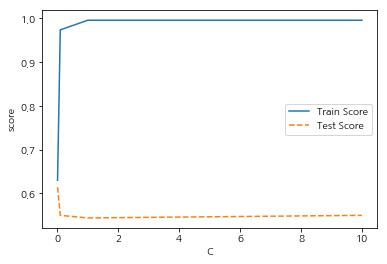

In [56]:
plt.plot(para_C, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_C, test_score, linestyle = '--', label = "Test Score")
plt.ylabel("score"); plt.xlabel("C")
plt.legend()

## COST 1로 설정 이후, kernel 최적화를 위해 gamma수치를 0.01부터 10까지 넣어가며 모델링 정확도 비교 

In [57]:
train_score = []; test_score = []

para_gamma = [10 ** gamma for gamma in range (-2,3)]

for v_gamma in para_gamma :
    svm = SVC(gamma = v_gamma, C = 1)
    svm.fit(df_scaled_train_x,df_train_y)
    train_score.append(svm.score(df_scaled_train_x, df_train_y))
    test_score.append(svm.score(df_scaled_val_x, df_val_y))
    
df_score_gamma = pd.DataFrame()
df_score_gamma["gamma"] = para_gamma
df_score_gamma["TrainScore"] = train_score
df_score_gamma["TestScore"] = test_score


df_score_gamma["D"] = df_score_gamma["TrainScore"]-df_score_gamma["TestScore"]

df_score_gamma.round(3)

,gamma,TrainScore,TestScore,D
0,0.01,0.987,0.971,0.016
1,0.10,0.996,0.947,0.048
2,1.00,1.000,0.637,0.363
3,10.00,1.000,0.637,0.363
4,100.00,1.000,0.637,0.363


## 위 표와 아래 그래프 확인 시, 정확도가 높고 Test와 Train 셋의 정확도 차이가 적은 0.01로 gamma값 설정

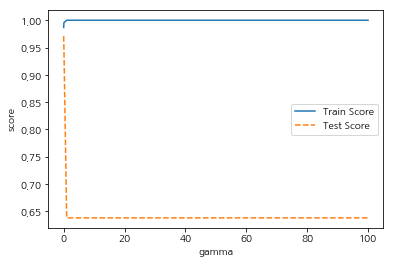

In [58]:
plt.plot(para_gamma, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_gamma, test_score, linestyle = '--', label = "Test Score")
plt.ylabel("score"); plt.xlabel("gamma")
plt.legend()

## 최종 모델의 hyper parameter는 C = 1, gamma = 0.01로 설정하여 최종 모델링 확정

In [61]:
svc_final = SVC(C = 1, gamma = 0.01)
svc_final.fit(df_scaled_train_x, df_train_y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## 마지막 test 데이터를 이용하여 최종 데이터 검증

## 악성 종양을 악성 종양으로 판단, 양성 종양을 양성 종양으로 판단할 정확률은 Test Data 기준으로 93%수준으로 나타났음, 의사결정나무/랜덤포레스트보다 약 3% 수준 정확도 개선된 모델링이지만, 의료용 데이터이므로 적어도 정확도가 95% 이상은 되어야 사용 가능할 것으로 판단됨

## 정분류(양성을 양성으로 판단한 데이터 55건, 악성을 악성으로 판단한 데이터 104건)

## 오분류 (양성을 악성으로 판단한 데이터 11건, 악성을 양성으로 판단한 데이터 1건)
>> RANDOM FOREST 모델 대비 3건 개선됨

In [1]:
y_pred = svc_final.predict(df_scaled_test_x)

print("Accuracy on training set: {0:.3f}\n".format(svc_final.score(df_scaled_train_x, df_train_y)))
print("Accuracy on test set: {0:.3f}\n".format(svc_final.score(df_scaled_test_x, df_test_y)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

NameError: name 'svc_final' is not defined

## Gridsearch에 의해 최적화된 파라미터는 C : 10 , gamma : 0.01

In [63]:
estimator = SVC()

param_grid = {"C":para_C, "gamma": para_gamma}

grid_svc = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
grid_svc.fit(df_scaled_train_x, df_train_y)

print("best estimator model : \n{}".format(grid_svc.best_estimator_))
print("\nbest parameter : \n{}".format(grid_svc.best_params_))
print("\nbest score : \n{}".format(grid_svc.best_score_.round(3)))

best estimator model : 
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

best parameter : 
{'C': 10, 'gamma': 0.01}

best score : 
0.982


## Gridsearch에 의해 최적화된 파라미터 넣고 다시 모델링한 결과는 아래와 같음

In [64]:
svc_final = SVC(C = 10, gamma = 0.01)
svc_final.fit(df_scaled_train_x, df_train_y)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# GRID SEARCH로 최적화된 파라미터 값 입력한 결과, TEST set 기준, 해당 모델링의 정확도 95%로 상승하여, 악성 종양 (유방암) 진단에 사용 가능성 검토 가능, 하지만 모델간 격차가 심하므로, 추가 검증이 필요할 것으로 사료됨

In [65]:
y_pred = svc_final.predict(df_scaled_test_x)

print("Accuracy on training set: {0:.3f}\n".format(svc_final.score(df_scaled_train_x, df_train_y)))
print("Accuracy on test set: {0:.3f}\n".format(svc_final.score(df_scaled_test_x, df_test_y)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 0.996

Accuracy on test set: 0.953

Confusion Matrix: 
[[ 60   6]
 [  2 103]]
